In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
#importing our cancer dataset
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('Breast_cancer_data.csv')

**EXPLORATORY DATA ANALYSIS**

In [2]:
dataset.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [3]:
dataset.shape

(569, 6)

In [4]:
dataset.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

From the data above it is clear that there are no missing values in our dataset and our dataset contains a total of **569** records and **6** features

In [5]:
#Basic information and description
dataset.info()

dataset.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


0

There are 569 enries with a total of 6 columns

In [6]:
dataset.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [7]:
#unique values

dataset['mean_radius'].unique()

dataset['mean_texture'].unique()

dataset['mean_perimeter'].unique()

dataset['mean_area'].unique()

dataset['mean_smoothness'].unique()

dataset['diagnosis'].unique() 

array([0, 1], dtype=int64)

In [8]:
#Datatypes

dataset.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

**Distribution**

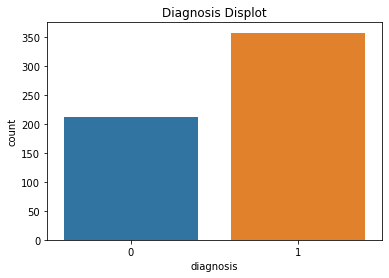

1    357
0    212
Name: diagnosis, dtype: int64

In [9]:
#Distribution of Target Variable - Diagnosis

sns.countplot(x='diagnosis', data=dataset)
plt.title('Diagnosis Displot')
plt.show()
dataset['diagnosis'].value_counts()

**In the dataset, 357 tumors are benign (1), while 212 tumors are malignant (0)**

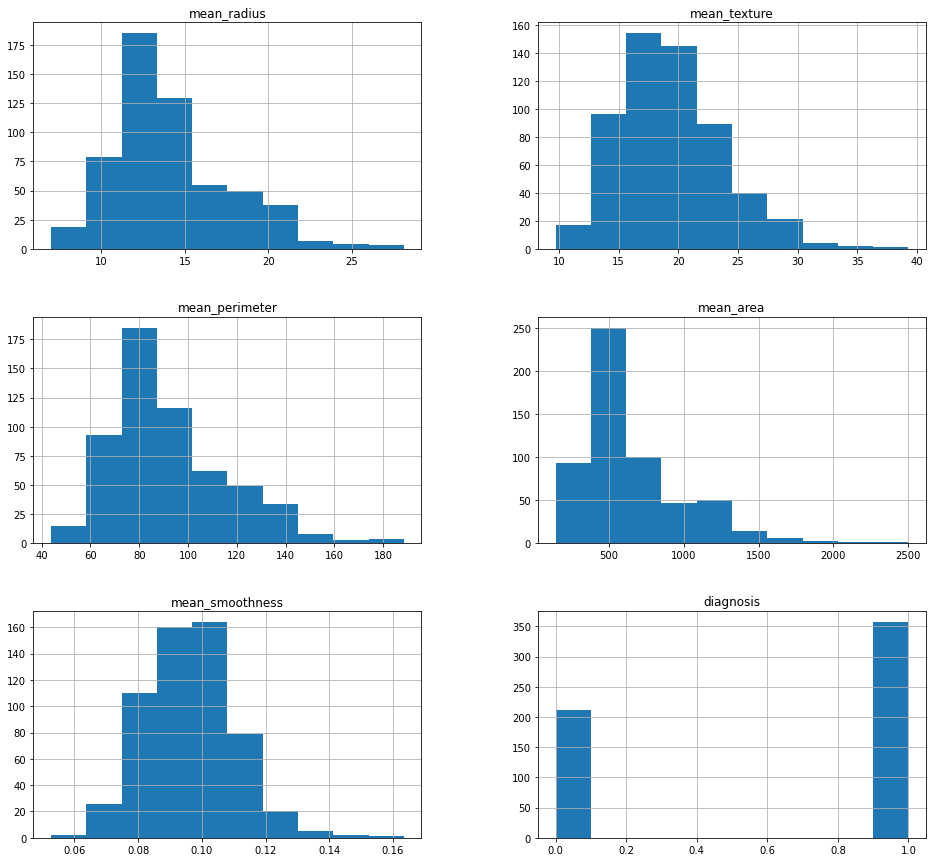

In [10]:
# Distribution graphs (histogram/bar graph) of Features columns
dataset.hist(figsize=(16, 15))
plt.show()

**The various distribution plot of the different features in the dataset showing the lowest and highest value of each features and frequency of the values.**

In [11]:
df_corr = dataset[[
    "mean_radius",
    "mean_perimeter",
    "mean_area",
    "mean_texture",
    "mean_smoothness"
]]

In [12]:
#Correlation

dataset.corr()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_radius,1.000000,0.323782,0.997855,0.987357,0.170581,-0.730029
mean_texture,0.323782,1.000000,0.329533,0.321086,-0.023389,-0.415185
mean_perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,-0.742636
mean_area,0.987357,0.321086,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.730029,-0.415185,-0.742636,-0.708984,-0.358560,1.000000


<AxesSubplot:>

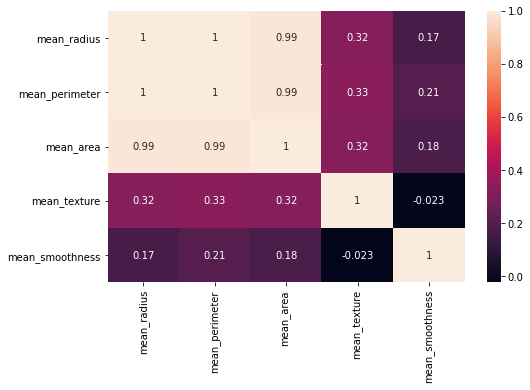

In [13]:
plt.figure(figsize=(8,5))
sns.heatmap(df_corr.corr(),annot=True)

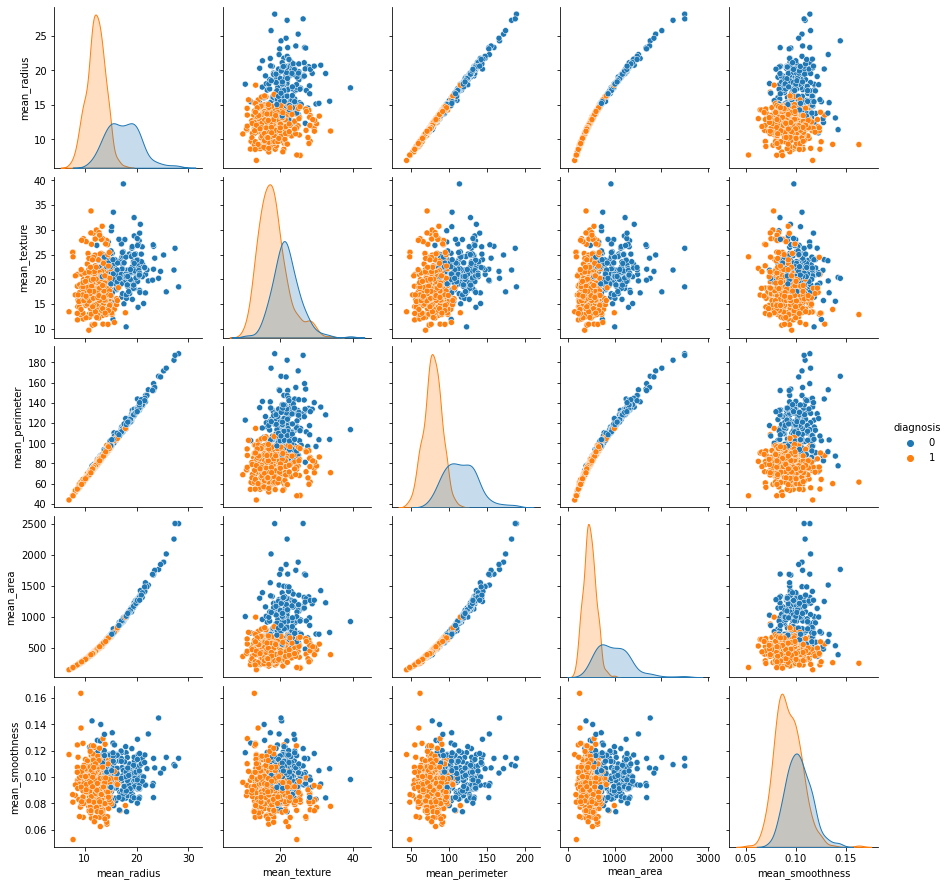

In [14]:
sns.pairplot(dataset, hue='diagnosis');

The mean_perimeter, mean_radius, mean_area have a highly positive correlation with each other

**The plot indicates that benign tumors (1) are associated with low values in mean perimeter, mean radius, mean area, mean texture and smoothness. While the malignant tumors (0) are associated with higher values in the above mentioned features.** 

In [15]:
#Feature Selection

from scipy.stats import pearsonr
for feature in dataset.drop('diagnosis',axis=1).columns:
    print(feature)
    corr, p_value = pearsonr(dataset[feature], dataset.diagnosis)
    print(p_value<0.05)

mean_radius
True
mean_texture
True
mean_perimeter
True
mean_area
True
mean_smoothness
True


**Outliers Detection**

<AxesSubplot:xlabel='mean_radius'>

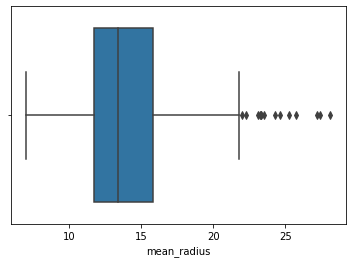

In [16]:
sns.boxplot(dataset['mean_radius'])

**Upper outliers detected**

<AxesSubplot:xlabel='mean_perimeter'>

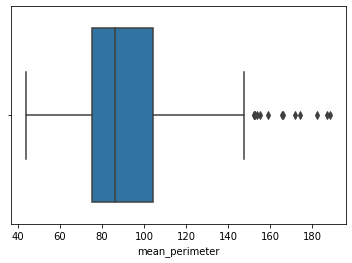

In [17]:
sns.boxplot(dataset['mean_perimeter'])

**Upper outliers detected**

<AxesSubplot:xlabel='mean_area'>

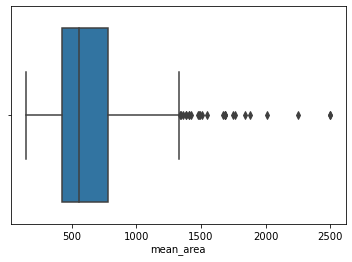

In [18]:
sns.boxplot(dataset['mean_area'])

**Upper outliers detected**

<AxesSubplot:xlabel='mean_smoothness'>

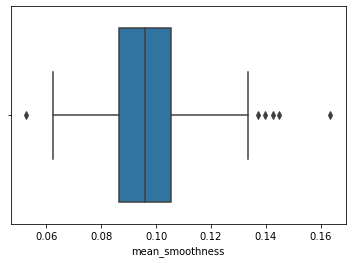

In [19]:
sns.boxplot(dataset['mean_smoothness'])

**Upper outliers detected**

<AxesSubplot:xlabel='mean_texture'>

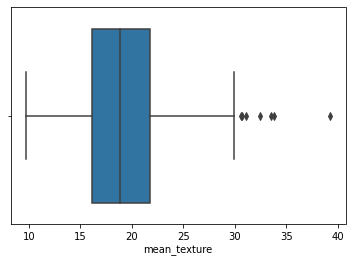

In [20]:
sns.boxplot(dataset['mean_texture'])

**Upper outliers detected**

<AxesSubplot:xlabel='diagnosis'>

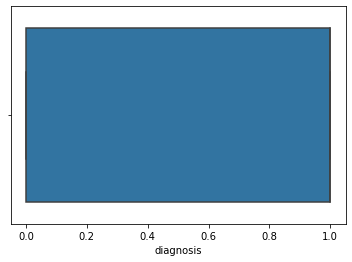

In [21]:
sns.boxplot(dataset['diagnosis'])

**No outliers detected**

In [22]:
zerodataset = dataset[dataset['diagnosis']==0]
onedataset = dataset[dataset['diagnosis']==1]
zerodataset.mean()

mean_radius         17.462830
mean_texture        21.604906
mean_perimeter     115.365377
mean_area          978.376415
mean_smoothness      0.102898
diagnosis            0.000000
dtype: float64

In [23]:
onedataset.mean()

mean_radius         12.146524
mean_texture        17.914762
mean_perimeter      78.075406
mean_area          462.790196
mean_smoothness      0.092478
diagnosis            1.000000
dtype: float64

## Feature Engineering

Looking at above data we can say that data **diagnosed with 0** is a **cancerous** cell i.e 'Malignant' while data **diagnosed with 1** is **less cancerous** or 'benign'.Hence, it would be appropriate to reverse diagnosis column output to say that 1 is for cancer or Malignant, for further analysis.

In [24]:
#Reverting Diagnosis column
outputcolumn = dataset['diagnosis']
finaloutputcolumn = []
for i in outputcolumn:
  if i == 0:
    finaloutputcolumn.append(1)
  elif i==1:
    finaloutputcolumn.append(0)
dataset['diagnosis'] = finaloutputcolumn

In [25]:
cancerpresent = dataset[dataset['diagnosis']==1]
cancernotpresent = dataset[dataset['diagnosis']==0]
print(cancerpresent.shape)
print(cancernotpresent.shape)

(212, 6)
(357, 6)


Now we observe the data has been reversed and now there are 212 records which shows records for 'Malignant' or cancerous cells.
+ Although some columns have outliers but the data is small and they did not deviate too much

In [26]:
#splitting features and output for further analysis
x = dataset.iloc[:,0:5]
y = dataset.iloc[:,5:]

In [27]:
# splitting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25,stratify = y, random_state = 0)

In [28]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model

In [29]:
# Defined different models
#Using Logistic Regression Algorithm to the Training Set
from sklearn.linear_model import LogisticRegression
LogisticRegressionClassifier = LogisticRegression(random_state = 0)
LogisticRegressionClassifier.fit(X_train, Y_train)

#Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
KNeighborsClassifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
SVMClassifier = SVC(kernel = 'linear', random_state = 0)
SVMClassifier.fit(X_train, Y_train)

#Using SVC method of svm class to use Kernel SVM Algorithm
from sklearn.svm import SVC
KernelSVMClassifier = SVC(kernel = 'rbf', random_state = 0)
KernelSVMClassifier.fit(X_train, Y_train)

#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
NaiveBayesClassifier = GaussianNB()
NaiveBayesClassifier.fit(X_train, Y_train)

#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DecisionTreeClassifier.fit(X_train, Y_train)

#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
RandomForestClassifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [30]:
#prediction:
LogisticRegressionClassifier_pred = LogisticRegressionClassifier.predict(X_test)
KNeighborsClassifier_pred = KNeighborsClassifier.predict(X_test)
SVMClassifier_pred = SVMClassifier.predict(X_test)
KernelSVMClassifier_pred = KernelSVMClassifier.predict(X_test)
NaiveBayesClassifier_pred = NaiveBayesClassifier.predict(X_test)
DecisionTreeClassifier_pred = DecisionTreeClassifier.predict(X_test)
RandomForestClassifier_pred = RandomForestClassifier.predict(X_test)

In [31]:
# Function for plotting confusion matrix for better visualisation
def confusionMatrix(cf_matrix):
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

  ## Display the visualization of the Confusion Matrix.
  return plt.show()

-----------------Logistic Regression----------------------
Confusion Matrix for Logistic Regression:-----------------


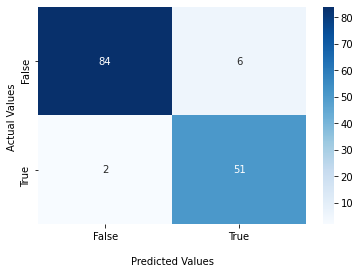

None
Classification for Logistic Regression:-------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        90
           1       0.89      0.96      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

----------------------------------------------------------
-----------------K Neighbor ------------------------------
Confusion Matrix for K Neighbor:--------------------------


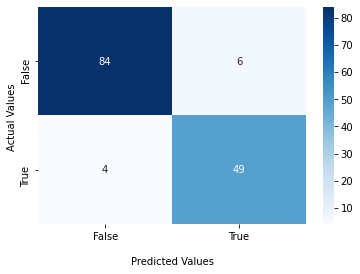

None
Classification for K Neighbor:----------------------------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        90
           1       0.89      0.92      0.91        53

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

----------------------------------------------------------
-------------------------SVM------------------------------
Confusion Matrix for SVM:---------------------------------


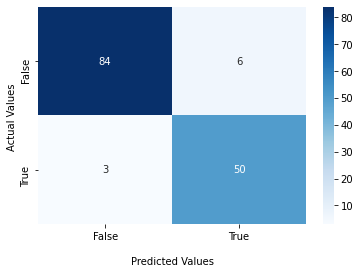

None
Classification for SVM:-----------------------------------
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        90
           1       0.89      0.94      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

----------------------------------------------------------
----------------------Kernel SVM    ----------------------
Confusion Matrix for Kernel SVM:--------------------------


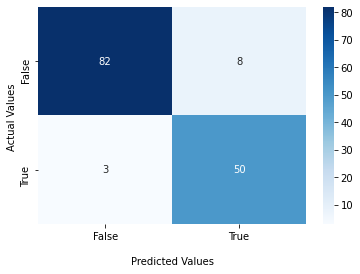

None
Classification for Kernel SVM:----------------------------
              precision    recall  f1-score   support

           0       0.96      0.91      0.94        90
           1       0.86      0.94      0.90        53

    accuracy                           0.92       143
   macro avg       0.91      0.93      0.92       143
weighted avg       0.93      0.92      0.92       143

----------------------------------------------------------
---------------------Naive Bayes--------------------------
Confusion Matrix for Naive Bayes:-------------------------


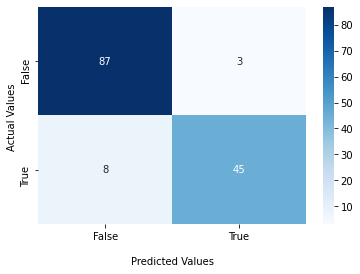

None
Classification for Naive Bayes:---------------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        90
           1       0.94      0.85      0.89        53

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143

----------------------------------------------------------
-----------------Decision Tree----------------------------
Confusion Matrix for Decision Tree:-----------------------


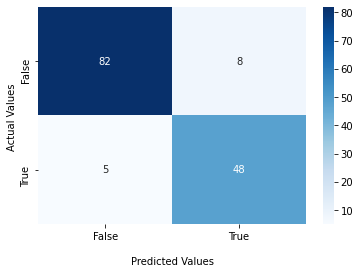

None
Classification for Decision Tree:-------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93        90
           1       0.86      0.91      0.88        53

    accuracy                           0.91       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.91      0.91       143

----------------------------------------------------------
--------------------Random Forest-------------------------
Confusion Matrix for Random Forest:-----------------------


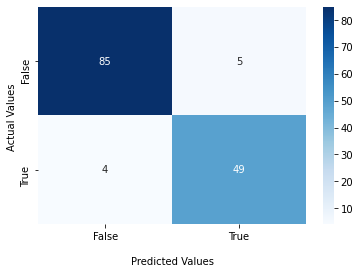

None
Classification for Random Forest:-------------------------
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        90
           1       0.91      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

----------------------------------------------------------


In [32]:
from sklearn.metrics import confusion_matrix,classification_report
print("-----------------Logistic Regression----------------------")
print("Confusion Matrix for Logistic Regression:-----------------")
confusionmatrixLogistic = confusion_matrix(Y_test, LogisticRegressionClassifier_pred)
print(confusionMatrix(confusionmatrixLogistic))
print("Classification for Logistic Regression:-------------------")
print(classification_report(Y_test, LogisticRegressionClassifier_pred))
print("----------------------------------------------------------")
print("-----------------K Neighbor ------------------------------")
print("Confusion Matrix for K Neighbor:--------------------------")
confusionmatrixKNeighbor = confusion_matrix(Y_test, KNeighborsClassifier_pred)
print(confusionMatrix(confusionmatrixKNeighbor))
print("Classification for K Neighbor:----------------------------")
print(classification_report(Y_test, KNeighborsClassifier_pred))
print("----------------------------------------------------------")
print("-------------------------SVM------------------------------")
print("Confusion Matrix for SVM:---------------------------------")
confusionmatrixSVM = confusion_matrix(Y_test, SVMClassifier_pred)
print(confusionMatrix(confusionmatrixSVM))
print("Classification for SVM:-----------------------------------")
print(classification_report(Y_test, SVMClassifier_pred))
print("----------------------------------------------------------")
print("----------------------Kernel SVM    ----------------------")
print("Confusion Matrix for Kernel SVM:--------------------------")
confusionmatrixKernelSVM = confusion_matrix(Y_test, KernelSVMClassifier_pred)
print(confusionMatrix(confusionmatrixKernelSVM))
print("Classification for Kernel SVM:----------------------------")
print(classification_report(Y_test, KernelSVMClassifier_pred))
print("----------------------------------------------------------")
print("---------------------Naive Bayes--------------------------")
print("Confusion Matrix for Naive Bayes:-------------------------")
confusionmatrixNaieveBayes = confusion_matrix(Y_test, NaiveBayesClassifier_pred)
print(confusionMatrix(confusionmatrixNaieveBayes))
print("Classification for Naive Bayes:---------------------------")
print(classification_report(Y_test, NaiveBayesClassifier_pred))
print("----------------------------------------------------------")
print("-----------------Decision Tree----------------------------")
print("Confusion Matrix for Decision Tree:-----------------------")
confusionmatrixDecisionTree = confusion_matrix(Y_test, DecisionTreeClassifier_pred)
print(confusionMatrix(confusionmatrixDecisionTree))
print("Classification for Decision Tree:-------------------------")
print(classification_report(Y_test, DecisionTreeClassifier_pred))
print("----------------------------------------------------------")
print("--------------------Random Forest-------------------------")
print("Confusion Matrix for Random Forest:-----------------------")
confusionmatrixRandomForest = confusion_matrix(Y_test, RandomForestClassifier_pred)
print(confusionMatrix(confusionmatrixRandomForest))
print("Classification for Random Forest:-------------------------")
print(classification_report(Y_test, RandomForestClassifier_pred))
print("----------------------------------------------------------")

In [33]:
from sklearn.metrics import accuracy_score
LogisticRegressionClassifier_accuracy = accuracy_score(Y_test, LogisticRegressionClassifier_pred)
KNeighborsClassifier_accuracy = accuracy_score(Y_test, KNeighborsClassifier_pred)
SVMClassifier_accuracy = accuracy_score(Y_test, SVMClassifier_pred)
KernelSVMClassifier_accuracy = accuracy_score(Y_test, KernelSVMClassifier_pred)
NaiveBayesClassifier_accuracy = accuracy_score(Y_test, NaiveBayesClassifier_pred)
DecisionTreeClassifier_accuracy = accuracy_score(Y_test, DecisionTreeClassifier_pred)
RandomForestClassifier_accuracy = accuracy_score(Y_test, RandomForestClassifier_pred)

In [34]:
FinalAccuracy=[LogisticRegressionClassifier_accuracy,KNeighborsClassifier_accuracy,SVMClassifier_accuracy,KernelSVMClassifier_accuracy,NaiveBayesClassifier_accuracy,DecisionTreeClassifier_accuracy,RandomForestClassifier_accuracy]
FinalResult = pd.DataFrame(FinalAccuracy,["LogisticRegressionClassifier_accuracy","KNeighborsClassifier_accuracy","SVMClassifier_accuracy","KernelSVMClassifier_accuracy","NaiveBayesClassifier_accuracy","DecisionTreeClassifier_accuracy","RandomForestClassifier_accuracy"],["AccuracyScore"])

In [35]:
FinalResult

,AccuracyScore
LogisticRegressionClassifier_accuracy,0.944056
KNeighborsClassifier_accuracy,0.930070
SVMClassifier_accuracy,0.937063
KernelSVMClassifier_accuracy,0.923077
NaiveBayesClassifier_accuracy,0.923077
DecisionTreeClassifier_accuracy,0.909091
RandomForestClassifier_accuracy,0.937063


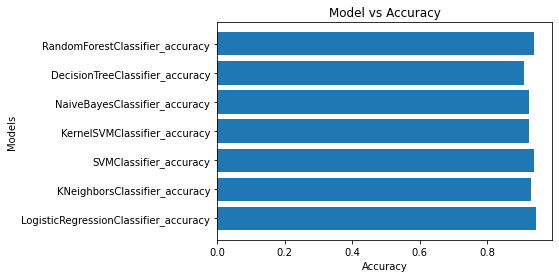

In [36]:
FinalResult1 = FinalResult.reset_index()
plt.barh(list(FinalResult1['index']),list(FinalResult1['AccuracyScore']))
plt.xlabel("Accuracy")
# setting y_label as model
plt.ylabel("Models")  
plt.title("Model vs Accuracy")
plt.show()

Logistic Regression has the best accuracy but that cannot be the sole parameter to decide best model. Since False Negative plays a critical role in situations like cancer. Predicting someone does not have cancer while he did. do, false negative or recall will be the main criterial to decide our final model

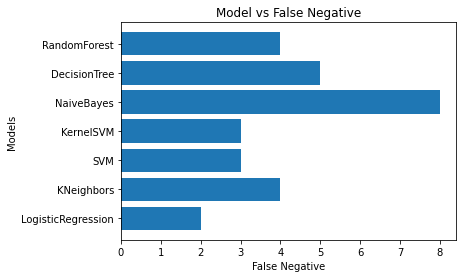

In [37]:
# we should aim at reducing false negative 
ModelNames = ['LogisticRegression','KNeighbors','SVM','KernelSVM','NaiveBayes','DecisionTree','RandomForest']
FalseNegative = [2,4,3,3,8,5,4]
Recall = [94,93,94,92,93,90,93]
plt.barh(ModelNames,FalseNegative)
plt.xlabel("False Negative")
# setting y_label as Model
plt.ylabel("Models")  
plt.title("Model vs False Negative")
plt.show()

After considering the False Negative Logistic Regression seems to have the least one.

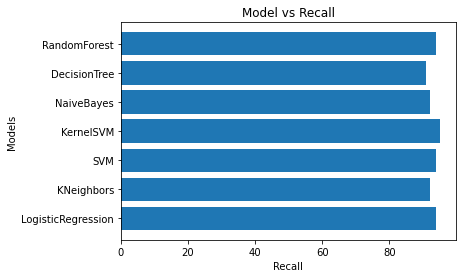

In [38]:
# we should aim at reducing false negative 
ModelNames = ['LogisticRegression','KNeighbors','SVM','KernelSVM','NaiveBayes','DecisionTree','RandomForest']
Recall = [94,92,94,95,92,91,94]
plt.barh(ModelNames,Recall)
plt.xlabel("Recall")
# setting y_label as Model
plt.ylabel("Models")  
plt.title("Model vs Recall")
plt.show()

From the graph above **Logistic Regression** and **Random Forest Classifier** have the same Best recall

### Considering all necessary metrics **Logistic Regression** is the best bet for this project.

In [39]:
# save the model to disk
#saving the model
filename = 'finalized_model_BreastCancer.h5'
pickle.dump(LogisticRegressionClassifier, open('finalized_model_BreastCancer.h5', 'wb'))

#saving the scale
pickle.dump(scaler, open('scale.h5', 'wb'))